# Ananlysis on ML Test Scores

Objective: Analyze student test performance across batches (AI_ELITE_4, AI_ELITE_6, AI_ELITE_7) to extract insights and compare performance trends.

## 1. Read the CSV file

In [ ]:
import pandas as pd

df = pd.read_csv("scores_data.csv")
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


## 2. Clean & Prepare the Score Column

In [ ]:
df.columns = df.columns.str.strip()
df['Score'] = df['Score'].str.split('/').str[0].astype(int)

## 3. Exploratory Data Analysis (EDA)

**3.1 Univariate Analysis**
- Summary Statistics for each batch

In [ ]:
batch_summary = df.groupby('Batch')['Score'].agg(['count','min','max']).reset_index()
batch_summary.columns = ['Batch','Total Students','Lowest Score','Highest Score']
batch_summary

,Batch,Total Students,Lowest Score,Highest Score
0,AI_ELITE_4,48,0,7
1,AI_ELITE_6,48,0,7
2,AI_ELITE_7,53,2,7


- Calculate Mean, Median, Mode (Overall Scores)

In [ ]:
mean_score = df['Score'].mean()
median_score = df['Score'].median()
mode_score = df['Score'].mode()[0]

print("Mean Score:", round(mean_score, 2))
print("Median Score:", median_score)
print("Mode Score:", mode_score)

Mean Score: 4.38
Median Score: 4.0
Mode Score: 4


- Score Variability (Spread)

In [ ]:
score_std = df['Score'].std()
score_range = df['Score'].max() - df['Score'].min()

print("Standard Deviation of Scores:", round(score_std, 2))
print("Range of Scores:", score_range)

Standard Deviation of Scores: 1.59
Range of Scores: 7


**3.2 Bivariate Analysis**
- Score Distribution (Frequency by Batch)

In [ ]:
score_distribution = df.groupby(['Batch','Score']).size().reset_index(name='Count')
score_distribution

,Batch,Score,Count
0,AI_ELITE_4,0,1
1,AI_ELITE_4,1,1
2,AI_ELITE_4,2,7
3,AI_ELITE_4,3,8
4,AI_ELITE_4,4,19
5,AI_ELITE_4,5,8
6,AI_ELITE_4,6,1
7,AI_ELITE_4,7,3
8,AI_ELITE_6,0,1
9,AI_ELITE_6,1,2


- Distribution of scores in each batch

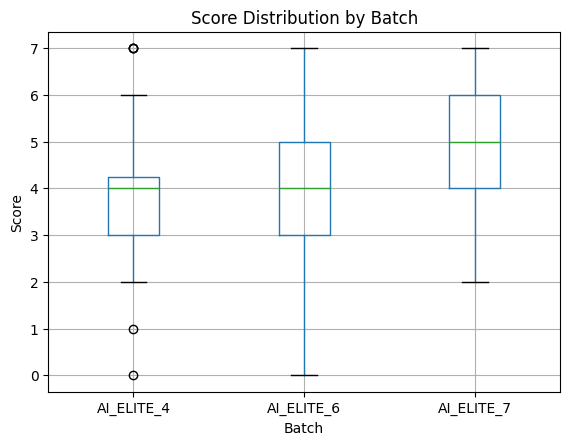

In [ ]:
import matplotlib.pyplot as plt

df.boxplot(column='Score', by='Batch')
plt.title('Score Distribution by Batch')
plt.suptitle('')
plt.xlabel("Batch")
plt.ylabel("Score")
plt.show()

- Calculate Mean, Median & Mode by Batch

In [ ]:
batch_stats = df.groupby('Batch')['Score'].agg(['mean', 'median', lambda x: x.mode()[0]])
batch_stats.columns = ['Mean', 'Median', 'Mode']
batch_stats = batch_stats.round(2)
batch_stats

,Mean,Median,Mode
Batch,,,
AI_ELITE_4,3.79,4.0,4
AI_ELITE_6,4.23,4.0,5
AI_ELITE_7,5.06,5.0,6


- Average score comparision of each batch

<Axes: xlabel='Batch'>

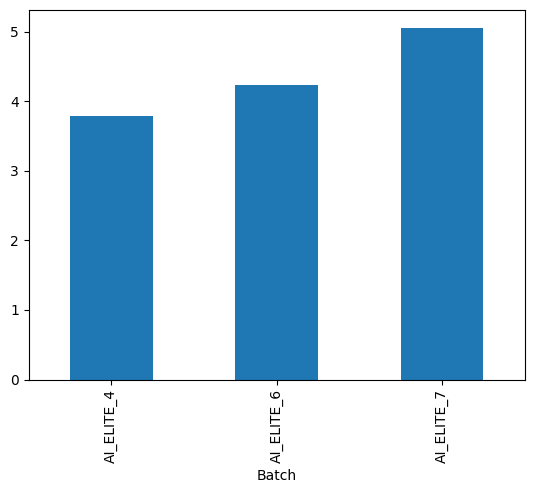

In [ ]:
df.groupby('Batch')['Score'].mean().plot(kind='bar')

## 4. Batch-wise Performance Categories

**4.1 Score Performance Categorization**

Lets assume and define performance groups:
*   High Performers: Score ≥ 6
*   Average Performers: Score 4-5
*   Low Performers: Score ≤ 3





In [ ]:
df['Performance'] = df['Score'].apply(
    lambda x: 'High (6-7)' if x>=6 else ('Average (4-5)' if x>=4 else 'Low (0-3)')
)

performance_split = df.groupby(['Batch','Performance']).size().reset_index(name='Count')
performance_split

,Batch,Performance,Count
0,AI_ELITE_4,Average (4-5),27
1,AI_ELITE_4,High (6-7),4
2,AI_ELITE_4,Low (0-3),17
3,AI_ELITE_6,Average (4-5),24
4,AI_ELITE_6,High (6-7),9
5,AI_ELITE_6,Low (0-3),15
6,AI_ELITE_7,Average (4-5),21
7,AI_ELITE_7,High (6-7),23
8,AI_ELITE_7,Low (0-3),9


## Key Insights from the analysis

*   AI_ELITE_7 batch performs the best with a mean score of 5.06 and highest number of top performers.
*   AI_ELITE_4 batch requires improvement, scoring the lowest with an average of 3.79 and the highest number of low performers.
*   AI_ELITE_6 batch is not quite balanced, but is still performing mid-way with 4.23 average, indicating consistent but average results.
*   The average score across all students is around 4-5, which means performance overall is moderate.

